<a href="https://colab.research.google.com/github/gtsagkatakis/Data-Science-and-Applications-2025/blob/main/485%5B2025%5D_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SVM Classification – Breast Cancer Dataset
In this exercise, you'll explore Support Vector Machines (SVMs) for binary classification using the Breast Cancer Wisconsin dataset. You'll go beyond just training a model — you'll investigate how SVMs make decisions, visualize decision boundaries, compare kernels, tune hyperparameters, and evaluate model confidence.

## Import necessary libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.decomposition import PCA



##Load & Explore the Breast Cancer Dataset

Use the built-in breast cancer dataset and get the basic characteristics for the data.

In [11]:
cancer = load_breast_cancer(as_frame=True)

df_cancer = cancer.frame

print("Dataset shape:", df_cancer.shape)
print("\nFeature names:", cancer.feature_names)
print("\nTarget classes:", cancer.target_names)

df_cancer.head()


Dataset shape: (569, 31)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target classes: ['malignant' 'benign']


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Question:** What kind of classification problem is this? Are the classes balanced?

This is a **binary classification** problem, where the goal is to classify tumors as either **malignant** or **benign**.

To check class balance, we can look at the value counts of the target:

```python
df_cancer['target'].value_counts()

## Preprocess the Data
Standardize the features and split the data.

In [12]:
X = df_cancer.drop(columns='target')
y = df_cancer['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


## Visualize with PCA (2D)

Use PCA to reduce the feature space to 2D and plot the points.

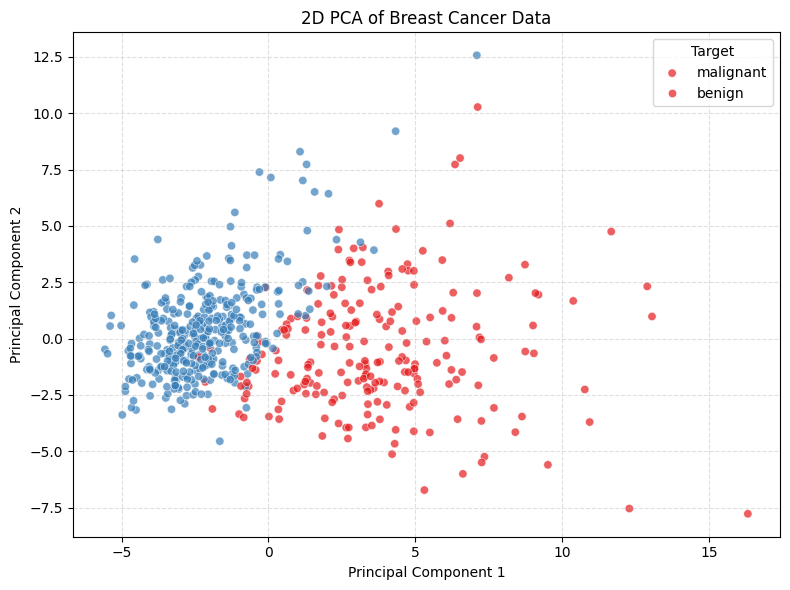

In [13]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)


pca_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_df['target'] = y.values


plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set1', alpha=0.7)
plt.title('2D PCA of Breast Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', labels=cancer.target_names)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


**Question:** Can the classes be separated linearly in this reduced space?

In the 2D PCA plot, we observe that the two classes (malignant and benign) form **fairly distinct clusters**, with only slight overlap.

This suggests that a **linear decision boundary** could work reasonably well in this space, although it's not perfect. A linear SVM might perform well, but more flexible kernels (like RBF) could potentially improve accuracy by better capturing the overlap region.


## Train & Evaluate a Linear SVM

Train an SVM with a linear kernel and evaluate its performance.

Classification Report (Linear Kernel):
              precision    recall  f1-score   support

   malignant       0.95      0.98      0.96        42
      benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



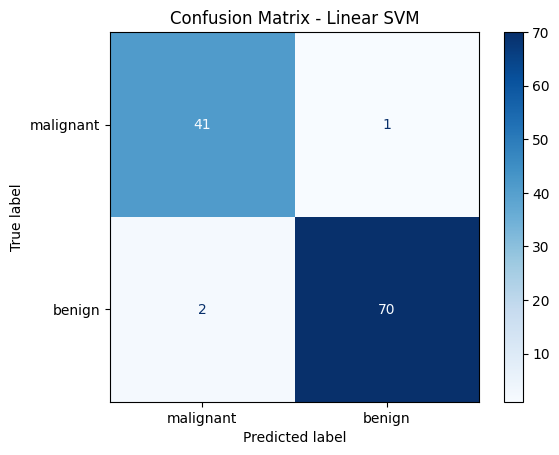

In [14]:

svm_linear = SVC(kernel='linear', random_state=42)

# Train
svm_linear.fit(X_train, y_train)

# Obsserve
y_pred_linear = svm_linear.predict(X_test)

# Rate
print("Classification Report (Linear Kernel):")
print(classification_report(y_test, y_pred_linear, target_names=cancer.target_names))

# Visualize Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svm_linear, X_test, y_test, display_labels=cancer.target_names, cmap='Blues')
plt.title("Confusion Matrix - Linear SVM")
plt.show()


## Visualize Decision Boundary (with PCA Projection)

Project the decision surface into PCA space (from previous task).


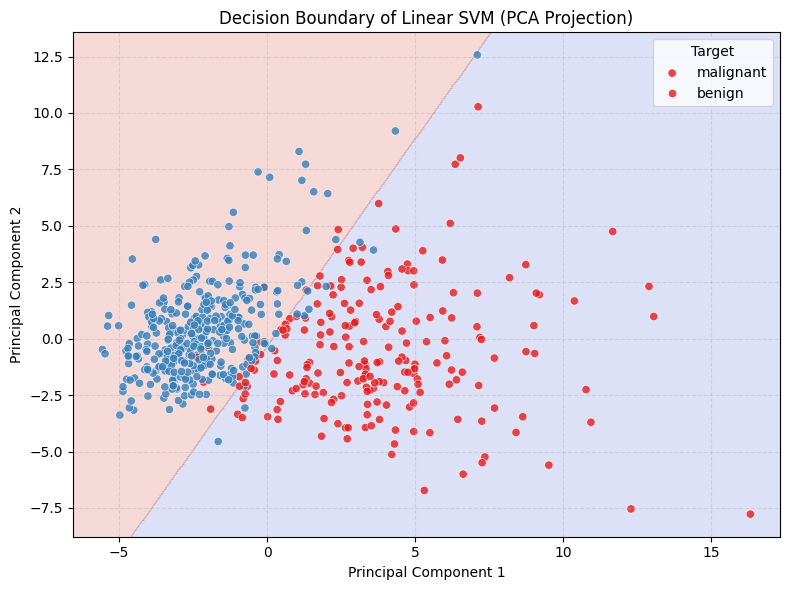

In [15]:
svm_pca = SVC(kernel='linear', random_state=42)
svm_pca.fit(X_pca_2d, y)

x_min, x_max = X_pca_2d[:, 0].min() - 1, X_pca_2d[:, 0].max() + 1
y_min, y_max = X_pca_2d[:, 1].min() - 1, X_pca_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot με decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette='Set1', alpha=0.8)
plt.title("Decision Boundary of Linear SVM (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Target', labels=cancer.target_names)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


## Train an SVM with RBF Kernel

Use a radial basis function kernel and compare its performance.

Classification Report (RBF Kernel):
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



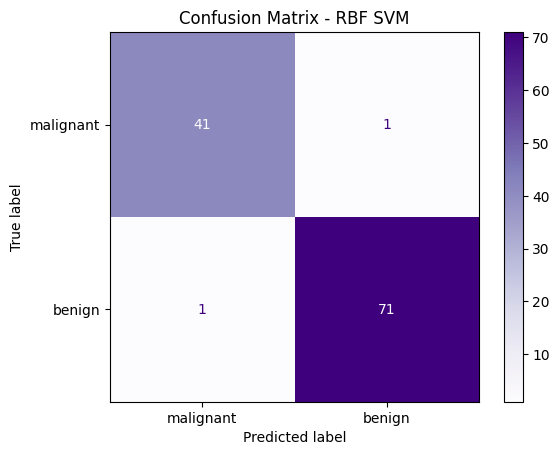

In [16]:
svm_rbf = SVC(kernel='rbf', random_state=42)

svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("Classification Report (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf, target_names=cancer.target_names))

ConfusionMatrixDisplay.from_estimator(svm_rbf, X_test, y_test, display_labels=cancer.target_names, cmap='Purples')
plt.title("Confusion Matrix - RBF SVM")
plt.show()


## Cross-Validation Comparison

Compare linear vs. RBF kernel using 5-fold cross-validation.

In [17]:
from sklearn.model_selection import cross_val_score

# Linear SVM
svm_linear_cv = SVC(kernel='linear', random_state=42)
scores_linear = cross_val_score(svm_linear_cv, X_scaled, y, cv=5)
print(f"Linear Kernel SVM - Mean Accuracy: {scores_linear.mean():.4f} (+/- {scores_linear.std():.4f})")

# RBF SVM
svm_rbf_cv = SVC(kernel='rbf', random_state=42)
scores_rbf = cross_val_score(svm_rbf_cv, X_scaled, y, cv=5)
print(f"RBF Kernel SVM   - Mean Accuracy: {scores_rbf.mean():.4f} (+/- {scores_rbf.std():.4f})")


Linear Kernel SVM - Mean Accuracy: 0.9701 (+/- 0.0105)
RBF Kernel SVM   - Mean Accuracy: 0.9736 (+/- 0.0147)


## Grid Search Hyperparameter Tuning (RBF)
Perform a grid search over `C` and `gamma` for the RBF kernel.

In [18]:

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# SVM w/ RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)

# Grid search w/ 5-fold CV
grid_search = GridSearchCV(svm_rbf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# better hyperparameters
print("Best parameters found:", grid_search.best_params_)
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")


Best parameters found: {'C': 10, 'gamma': 0.01}
Best cross-validated accuracy: 0.9802


## Evaluate Model Confidence (Decision Function)

Plot the decision function (histogram) or prediction confidence on the PCA plot.


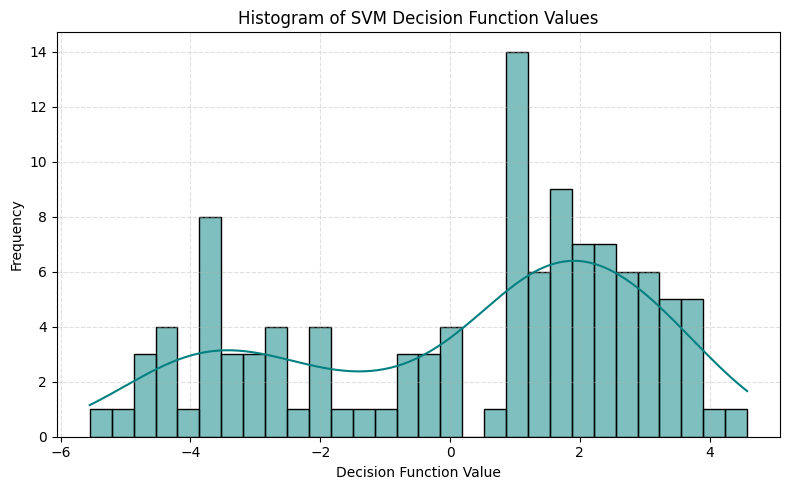

In [19]:
best_svm = grid_search.best_estimator_

decision_scores = best_svm.decision_function(X_test)

plt.figure(figsize=(8, 5))
sns.histplot(decision_scores, kde=True, bins=30, color='teal')
plt.title("Histogram of SVM Decision Function Values")
plt.xlabel("Decision Function Value")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


**Question:** Are predictions well-separated or clustered near the margin?

Based on the histogram of the SVM decision function values, most predictions appear to be **well-separated**, with values concentrated away from zero. This indicates that the model is generally confident in its predictions.

If many values were close to zero (the margin), it would suggest **low confidence** and many points near the decision boundary. In our case, the distribution suggests that the model has made clear distinctions between classes.
